This notebook searches a root folder for images and annotations. It saves the data it find in a single pickle file.

In [61]:
import csv
import cv2
import numpy
import os
import pandas
import pickle

In [62]:
# Rood Folder is the only input for this notebook.
# Set RootFolder as full path of the folder that includes annotations and images subfolders.

RootFolder = "m:\Temp"

images_folder = os.path.join(RootFolder, "images")
annotations_folder = os.path.join(RootFolder, "annotations")
image_file_list = os.listdir(images_folder)
annotation_file_list = os.listdir(annotations_folder)
num_images = len(image_file_list)

print("Found {} images".format(num_images))
print("Found {} annotation files".format(len(annotation_file_list)))

Found 814 images
Found 1 annotation files


In [63]:
# Read annotation data from csv files and concatenate them in a single DataFrame

df = pandas.DataFrame()

for i in range(len(annotation_file_list)):
    current_file_path = os.path.join(annotations_folder, annotation_file_list[i])
    df = pandas.concat([df, pandas.read_csv(current_file_path)])
    
print("Number of positive images found: {}".format(df.shape[0]))

Number of positive images found: 27


In [64]:
# Allocate memory for data, load images, and save resized images.
# Image width and height may need to be adjusted when different ultrasound machines are used.

image_width = 512
image_height = 512
image_data = numpy.zeros([num_images, image_width, image_height]).astype(numpy.uint8)
class_data = numpy.zeros([num_images, 2])

for i in range(num_images):
    current_file_name = image_file_list[i]
    current_file_path = os.path.join(images_folder, current_file_name)
    image = cv2.imread(current_file_path, 0)
    if image.shape[0] != image_width or image.shape[1] != image_height:
        image_data[i] = cv2.resize(image, image_width, image_height).astype(numpy.uint8)
    else:
        image_data[i] = image.astype(numpy.uint8)
    if df.loc[df.filename == current_file_name].shape[0] == 0:  # negative image class
        class_data[i, 0] = 1
    else:
        class_data[i,1] = 1

Showing image #322 of 814


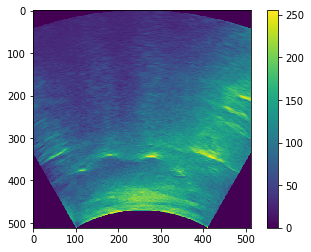

In [65]:
# Show an example positive image to make sure data is read properly.
# This cell is not necessary to generate output, but it's nice to check that the data looks good.

positive_indices = numpy.where(class_data[:,1]==1)
image_index = positive_indices[0][len(positive_indices[0]) // 2]
print("Showing image #{} of {}".format(image_index, num_images))

import matplotlib.pyplot as plt
plt.imshow(image_data[image_index, :, :])
plt.colorbar()
plt.show()

In [66]:
# Save image and classification data into files

images_pickle_file = os.path.join(RootFolder, "images.pkl")
class_pickle_file = os.path.join(RootFolder, "classes.pkl")

numpy.save(images_pickle_file, image_data)
numpy.save(class_pickle_file, class_data)